# EECS 495 Homwwork 2

## Student: Mingfu Liang

## Student ID: 3146919

## NetID: MLQ4767

## Email: mingfuliang2020@u.northwestern.edu

Please perform the following exercises, each of which is worth $10$ points.  The instructions for most can be found at the end of the Chapter notes, however several include additional information / starter code which is provided below.

 - **Chapter 7:** Exercises: 2, 3, and 5
 
 - **Chapter 8:** Exercises: 1, 2, and 4

Note: in completing Exercises $3$ and $5$ of Chapter 7 and Exercise 5 of Chapter 8 you may want to *flatten* your cost function prior to minimizing it since both the multi-class model and the Linear Autoencoder take in a **matrix** of weights.  You can find instructinos about how to do this via `autograd` in the attached Jupyter notebook called `flattening_functions_using_autograd.ipynb`.

In [1]:
%matplotlib inline
# import autograd / numpy necessities
from autograd import numpy as np

# set path to datasets
datapath = 'datasets/'

# Chapter 7 Exercise 2

In [150]:
%matplotlib inline
# import autograd / numpy necessities
from autograd import numpy as np

# set path to datasets
datapath = 'datasets/'
# location of dataset
csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

First let we visualize the y and see how many class of classification:

In [151]:
print (y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]


Then we returen the y's and x's shape:

In [152]:
y.shape

(1, 40)

In [153]:
x.shape

(2, 40)

Now we defined the softmax cost function and fusion rule for One-versus-All classiﬁcation algorithm:

In [154]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# softmax
def softmax(w,y):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

# the fusion rule
def fusion_rule(x,w):
    return np.argmax(model(x,w))

Then we define the gradient descent function for cost function optimization:

In [155]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history


Now we define the One-versus-All multiclass classification as follow:

In [161]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 

def OvA_multi_class(x,y):
    Optimal_W= []
    for j in range(len(C)):
        y_temp_lab=np.where(y==j,1,-1)
       
        alpha_choice = 0.1
        max_its = 1500
        w = 0.1*np.random.randn(3,1)
        g = lambda  w : softmax(w,y_temp_lab)
        
        weight_history,cost_history= gradient_descent(g,alpha_choice,max_its,w)
     
        w = weight_history[-1]
  
        Optimal_W.append(w/np.linalg.norm(w))
        print(w)
    return Optimal_W

Then we calculate the optimal weight as w1 by calling the One-versus-All multiclass classification:

In [162]:
w1 = OvA_multi_class(x,y)

[[-1.03957372]
 [-4.61505204]
 [ 3.65530536]]
[[-3.45428239]
 [ 2.19911038]
 [ 2.64094773]]
[[ 1.3853974 ]
 [-2.54565468]
 [-3.08828946]]
[[-1.31130456]
 [ 4.01557589]
 [-4.21550654]]


Based on the optimal weight we obtain the prediction of y as follow:

In [163]:
# make the predictions
pred = np.argmax(model(x,np.squeeze(w1).T), axis=0)   #2,40 3,4

Now we print out the predcition of y and we calculate the misclassification of our algorithm:

In [166]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3])

Now we find out the misclassification when our prediction is different from corresponding groundtruth data y:

In [167]:
misclassification=y[np.where(pred != y)]

Now we want to know how many missclassification we get:

In [168]:
misclassification.shape

(9,)

Therefore, we obtain 9 misclassifications and less than 10 misclassiﬁcations.

# Chapter 7 Exercise 3 

In [361]:
%matplotlib inline
# import autograd / numpy necessities
from autograd import numpy as np

# set path to datasets
datapath = 'datasets/'
# location of dataset
csvname = datapath + '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

First let we visualize the y and see how many class of classification:

In [362]:
print (y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2.]]


Now we define model function in order to compute C linear combinations of input point and the multiclass perceptron cost function as follow:

In [363]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
lam = 10**-5  # our regularization paramter 
def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

Then we define the gradient descent function:

In [364]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Now we define the parameters associated with the multiclass perceptron cost optimization as follow:

In [373]:
g = multiclass_perceptron;w = 0.01*np.random.randn(3,3); 
max_its = 1000; alpha_choice = 10**(-1);
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)



'''If you want to reproduce the result, use w = array([[ 0.00048942, -0.00402983,  0.0076655 ],
                                                       [ 0.00417396, -0.01156446,  0.00104481],
                                                       [-0.00708779, -0.00905898, -0.00523861]])'''

'w = array([[ 0.00048942, -0.00402983,  0.0076655 ],\n       [ 0.00417396, -0.01156446,  0.00104481],\n       [-0.00708779, -0.00905898, -0.00523861]])'

Since w is randomized, therefore we want to know in each experiment what w is using and we print it out as following:

In [374]:
w

array([[ 0.00499531,  0.01123431, -0.01107368],
       [ 0.00837053, -0.00967648, -0.00726228],
       [ 0.01076717, -0.00784266, -0.00139685]])

We also print the last line of weight history:

In [375]:
weight_history[-1]

array([[ 0.00499531, -0.03543236,  0.03559299],
       [-0.0609418 ,  0.05439846, -0.00202432],
       [ 0.0576534 ,  0.01994046, -0.07606631]])

Then we define the cost funciton history plotter to visualize the cost function history:

In [376]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the cost history of multiclass perceptron as below:

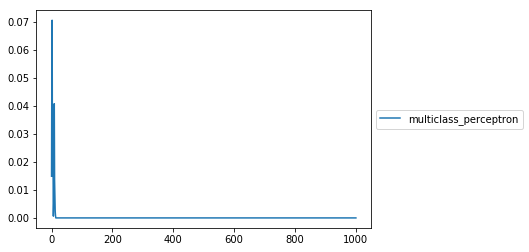

In [377]:
plot_cost_histories([cost_history],labels = [r'multiclass_perceptron'])

In order to confirm that we indeed obtain zero misclassification, we use the multiclass_illustrator module in superlearn library from Professor Jeremy Watt's [github](https://github.com/jermwatt/mlrefined/blob/gh-pages/mlrefined_libraries/superlearn_library/multiclass_illustrator.py):

In [378]:
import sys
sys.path.append('../')
from superlearn_library import multiclass_illustrator

In [379]:
E3 = superlearn.multiclass_illustrator.Visualizer(data)

From the figures below we can confirm that our algorithm indeed get zero misclassification. For some concerns, here the jupyter notebook can not plot the black line on the boundary between red and blue classfication due to my python and matplotlib version. However, it should have a black line over there.

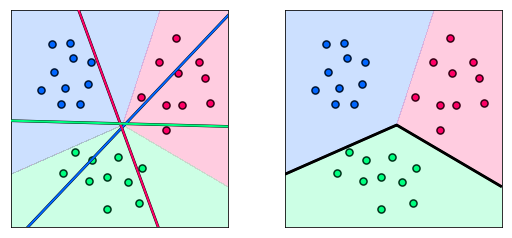

In [380]:
E3.show_complete_coloring(weight_history, cost = multiclass_perceptron)

# Chapter 7 Exercise 5

In [62]:
%matplotlib inline
# import autograd / numpy necessities
from autograd import numpy as np

# set path to datasets
datapath = 'datasets/'
# location of dataset
csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

First let we visualize the y and see how many class of classification:

In [63]:
print (y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]


Then we returen the y's and x's shape:

In [64]:
y.shape

(1, 40)

In [65]:
x.shape

(2, 40)

Now we define model function in order to compute C linear combinations of input point and the multiclass softmax cost function as follow:

In [66]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass softmaax 
lam = 10**(-5)  # our regularization paramter 
def multiclass_softmax(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

Then we define the gradient descent function:

In [67]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Then we define the cost funciton history plotter to visualize the cost function history:

In [68]:
g = multiclass_softmax; w = 0.01*np.random.randn(3,4); max_its = 5000; alpha_choice = 0.01;
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)

Since w is randomized, therefore we want to know in each experiment what w is using and we print it out as following:

In [69]:
w

array([[ 0.0005488 ,  0.00279889,  0.00585516, -0.00428178],
       [-0.00688702,  0.00202041, -0.00714687,  0.01370958],
       [-0.00550608, -0.0090076 ,  0.01366805, -0.00275531]])

We also print the last line of weight history:

In [70]:
weight_history[-1]

array([[ 0.02480375, -0.91455246,  0.97486245, -0.08019267],
       [-1.90884887,  0.95138025, -0.90813606,  1.86730074],
       [ 1.71673491,  1.20501244, -1.17141699, -1.75393122]])

Then we define the cost funciton history plotter to visualize the cost function history:

In [71]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the cost history of multiclass softmax as below:

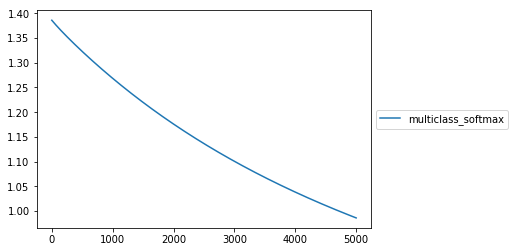

In [72]:
plot_cost_histories([cost_history],labels = [r'multiclass_softmax'])

In order to confirm that we indeed obtain zero misclassification, we use the multiclass_illustrator module in superlearn library from Professor Jeremy Watt's [github](https://github.com/jermwatt/mlrefined/blob/gh-pages/mlrefined_libraries/superlearn_library/multiclass_illustrator.py):

In [73]:
import sys
sys.path.append('../')
from superlearn_library import multiclass_illustrator

In [74]:
E5 = multiclass_illustrator.Visualizer(data)

We can count the misclassification of the image on the right and we can see that there are one green point and one red point which are misclassfied as blue class; one blue point, one green point and one orange point are misclassfied as red class; one red point and two green point are misclassified as orange class; No misclassification in green class. If we count the points are on the boundary line which are one blue point and one green point, we have totally ten misclassification based on our algorith. Therefore, our trained model achieves a small number of misclassiﬁcations (10 or fewer).

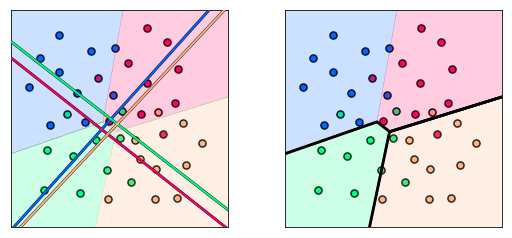

In [75]:
E5.show_complete_coloring(weight_history, cost = multiclass_softmax)

# Chapter 8 Exercise 1

As the simplest example imagine our spanning set was the set of  $N$  standard basis vectors. The  $n^{th}$  element of a standard basis takes the form of vectors that consist entirely of zeros, except for a  1  in its  $n^{th}$  slot. For the equation $w_p = C^{T}x_p$, when we use standard basis, it is trival that we can check that the perfect weight must be simplified as $w_{n,p} = x_{n,p}$, where each weight is simply equal to the value of the data point we aim to represent.

# Chapter 8 Exercise 2

In [2]:
import matplotlib.pyplot as plt

First we visualize the orginal data with spanning vector as follow:

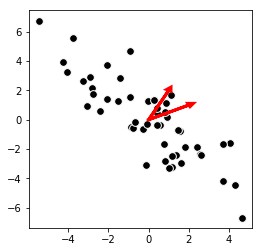

In [3]:
%matplotlib inline
# import autograd / numpy necessities
from autograd import numpy as np

# set path to datasets
datapath = 'datasets/'
# location of dataset
csvname = datapath + '2d_span_data_centered.csv'

# load in dataset
X = np.loadtxt(csvname,delimiter = ',')

# plot dataset

figure = plt.figure(figsize = (4,4))
ax = plt.axes()
plt.scatter(X[0,:],X[1,:],s=60,c='k',edgecolor='w')
ax.arrow(0, 0, 1, 2, head_width = 0.25, head_length = 0.25, fc = 'red', ec='red', linewidth=3)
ax.arrow(0, 0, 2, 1, head_width = 0.25, head_length = 0.25, fc = 'red', ec='red', linewidth=3)
plt.show()

Then we print the shape of X:

In [4]:
X.shape

(2, 50)

Then we construct the $C$:

In [5]:
C = np.array([[2,1],[1,2]])

Now we define the least squares cost function for computing the optimal weight vector $w_{p}$ and the gradient descent function for optimization:

In [7]:
# least squares cost function for Equation 8.7
def least_squares(W):
    cost = np.sum((np.dot(C,W) - X)**2)
    return cost/float(X.shape[1])

from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Then we set up the parameters for the least squares cost function optimization and optimize it:

In [8]:
W = np.random.rand(2,50); g=least_squares;alpha_choice = 10**(-1); max_its = 2000; C = np.array([[2,1],[1,2]]);
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,W)

Then we define the cost function history plotter to visualize the cost history:

In [9]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we visualize the cost history:

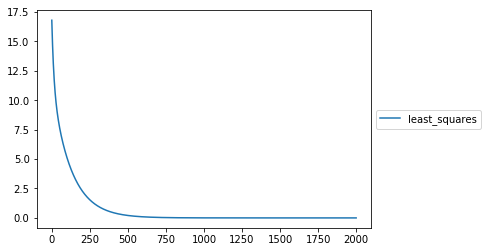

In [10]:
plot_cost_histories([cost_history],labels = [r'least_squares'])

Now we define X_hat as the encoding data:

In [11]:
X_hat=weight_history[-1]

And then we visualize the encoding data and the spanning vector as follow:

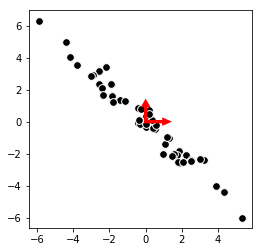

In [12]:
figure = plt.figure(figsize = (4,4))
ax = plt.axes()
plt.scatter(X_hat[0,:],X_hat[1,:],s=60,c='k',edgecolor='w')
ax.arrow(0, 0, 0, 1, head_width = 0.25, head_length = 0.25, fc = 'red', ec='red', linewidth=3)
ax.arrow(0, 0, 1, 0, head_width = 0.25, head_length = 0.25, fc = 'red', ec='red', linewidth=3)
plt.show()

For your convience, we use the unsupervised library from Professor Jeremy Watt's [github](https://github.com/jermwatt/mlrefined/blob/gh-pages/mlrefined_libraries/unsupervised_library/span_animation.py):

In [13]:
import sys
sys.path.append('../')
from mlrefined_libraries import unsupervised_library as unsuplib

Now we reproduce the result of $Figure$ 8.2 and it is obvious that our results above is correct.

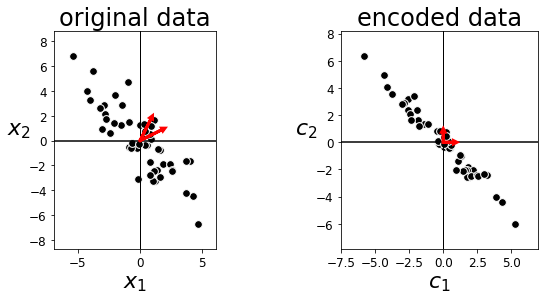

In [14]:
unsuplib.span_animation.perfect_visualize_transform_static(C,X=X)

# Chapter 8 Exercise 4

In [77]:
import matplotlib.pyplot as plt

First we visualize the orginal data as below:

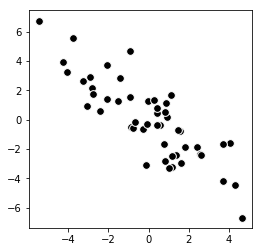

In [78]:
%matplotlib inline
# import autograd / numpy necessities
from autograd import numpy as np

# set path to datasets
datapath = 'datasets/'
# location of dataset
csvname = datapath + '2d_span_data_centered.csv'

# load in dataset
X = np.loadtxt(csvname,delimiter = ',')

# plot dataset
figure = plt.figure(figsize = (4,4))
plt.scatter(X[0,:],X[1,:],s=60,c='k',edgecolor='w')
plt.show()

Now we print the shape of X:

In [79]:
X.shape

(2, 50)

Then we simulate the function $g(C)$ as $Equation$ 8.17 in chapter 8:

In [80]:
C = np.array([[-3.5],[3.5]])

def g(C):
    cost = np.sum((np.dot(C,np.dot(C.T,X)) - X)**2)
    return cost/float(X.shape[1])


c1 = np.linspace(-5,5,500)
c2 = np.linspace(-5,5,500)
y = []
for i in range(c1.shape[0]):
    for j in range(c2.shape[0]):
        y.append(g(np.array([[c1[i]],[c2[j]]])))

Now we print our the value of $g(C)$ in our simulation:

In [81]:
y

[2574.862898783015,
 2545.843165128322,
 2517.2904824770485,
 2489.200534041652,
 2461.5690305009834,
 2434.391710000272,
 2407.6643381511326,
 2381.3827080315596,
 2355.5426401859363,
 2330.1399826250267,
 2305.170610825981,
 2280.6304277323284,
 2256.5153637539865,
 2232.821376767255,
 2209.5444521148147,
 2186.680602605734,
 2164.225868515463,
 2142.1763175858346,
 2120.5280450250675,
 2099.277173507763,
 2078.4198531749057,
 2057.9522616338636,
 2037.870603958389,
 2018.1711126886178,
 1998.8500478310702,
 1979.9036968586488,
 1961.3283747106398,
 1943.1204237927145,
 1925.276213976927,
 1907.792142601714,
 1890.6646344718977,
 1873.890141858683,
 1857.465144499659,
 1841.386149598797,
 1825.6496918264531,
 1810.2523333193683,
 1795.1906636806643,
 1780.461299979848,
 1766.0608867528108,
 1751.9860960018277,
 1738.233627195554,
 1724.800207269033,
 1711.6825906236907,
 1698.8775591273336,
 1686.3819221141548,
 1674.1925163847316,
 1662.3062062060228,
 1650.7198833113719,
 1639.4304

Now we make a contour plot on the range $[5,5]$X$[5,5]$ of the Linear Autoencoder in Equation (8.17) over the dataset shown in the left panel of Figure 8.5 in chapter 8:

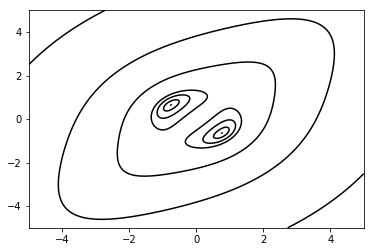

In [82]:
import matplotlib.pyplot as plt
import numpy as np
C1,C2 = np.meshgrid(c1, c2)
image = plt.contour(C1, C2, np.array(y).reshape(500,500), [1,2,5,10,100,1000,10000,50000],colors='black', linewidth=.5)

From the image above we can obviously see that there are two global minima. Given the concept of the Linear Autoencoder and the result described in Example 8.3, the optimal spanning vector(s) represented by these minima are orthonormal. From the image above we can obviously see that the left global minima is the same as the one shown in the left panel of Figure 8.5. The right global minima in the image above is in the opposite direction to the one shown in the left panel of Figure 8.5.
